In [555]:
# Let's first load the provided dataset to understand its structure and content.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = data_path = "/Users/RayhanZirvi/Desktop/time_series_produce.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,State,2015,2016,2017,2018,2019,2020,2021
0,AK,28.377611,29.541594,28.148191,29.848039,29.707637,30.774524,28.187300
1,AL,8.624941,7.269939,9.176394,10.303996,10.616535,12.377056,10.737540
2,AR,9.076310,8.279883,7.291248,6.791422,8.892164,10.617034,8.892412
3,AZ,9.496083,10.801586,11.779914,11.496771,10.805599,12.067408,13.429503
4,CA,30.155036,39.801867,47.206483,43.390993,48.192775,42.578106,41.054263


In [556]:
# Creating clusters based on the provided grouping
clusters = {
    "Green-Scarce": ["AL", "AR", "AZ", "CT", "DE", "FL", "GA", "HI", "IL", "IN",
                     "KY", "LA", "MA", "MD", "MI", "MO", "NC", "NJ", "NY",
                     "OH", "PA", "RI", "SC", "TN", "TX", "UT", "VA", "WI", "WV"],
    "Emerging Greens": ["AK", "CA", "CO", "DC", "KS", "MN",
                        "MT", "ND", "NE", "NM", "NV", "OK", "WY"],
    "Green Leaders": ["IA", "ME", "OR", "SD", "WA"],
    "Renewable Reliants": ["ID", "VT"]
}

# Initializing a DataFrame to hold the averaged data for each cluster
cluster_averages = pd.DataFrame(columns=data.columns[1:])  # Exclude 'State' column

# Calculating average for each cluster
for cluster_name, states in clusters.items():
    # Filter the dataset for states in the current cluster and calculate the mean
    cluster_mean = data[data['State'].isin(states)].iloc[:, 1:].mean()
    cluster_averages.loc[cluster_name] = cluster_mean

cluster_averages.head()

,2015,2016,2017,2018,2019,2020,2021
Green-Scarce,6.489927,6.723124,7.713063,8.032506,8.522953,9.811237,10.121639
Emerging Greens,24.241630,28.585843,32.247413,32.456588,31.681481,34.383222,35.479959
Green Leaders,63.946757,65.308767,68.138653,65.732565,65.604613,71.832721,69.081649
Renewable Reliants,87.236410,88.937764,90.674929,90.640210,88.132872,88.012988,84.941871


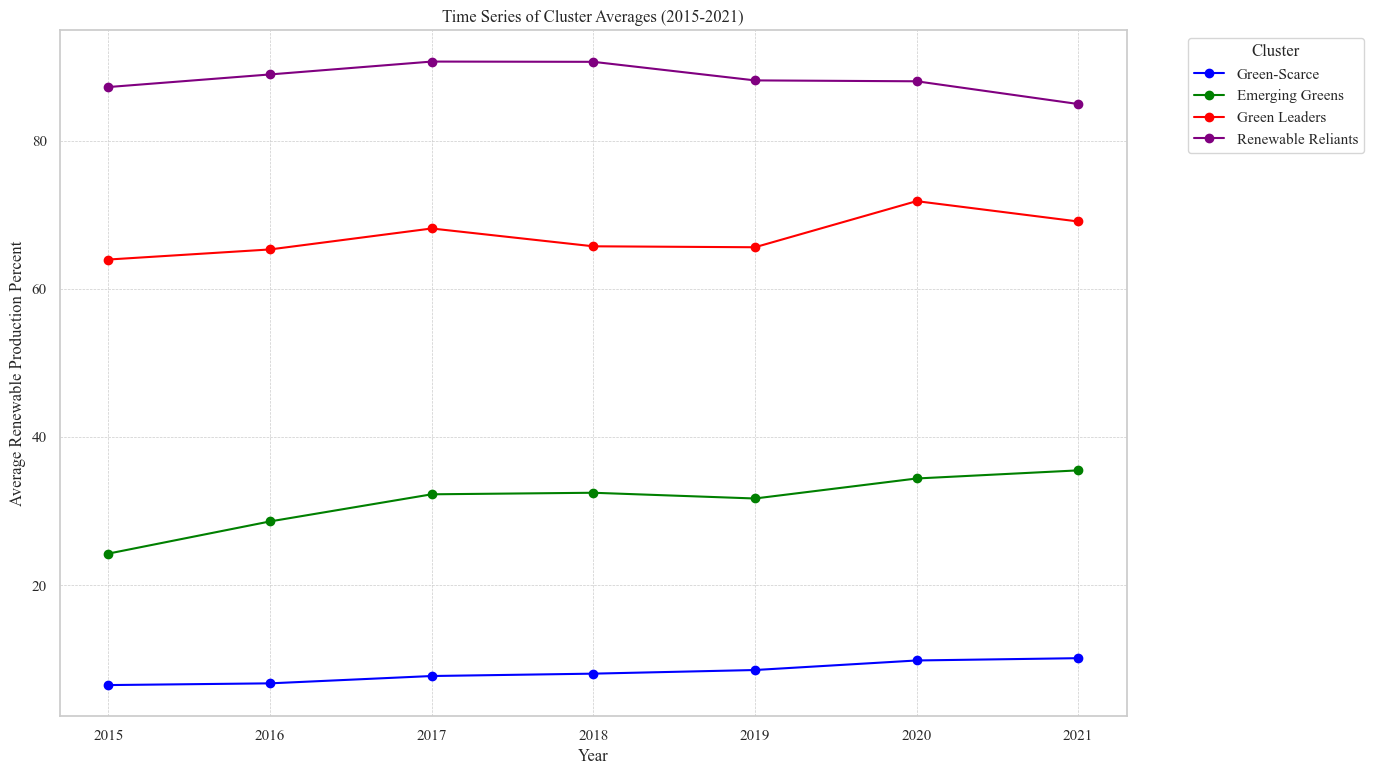

In [557]:
# Plotting time series for each cluster of states with distinguishable colors and dots on each data point
fig, ax = plt.subplots(figsize=(14, 8))

# Defining a list of distinguishable colors
colors = ['blue', 'green', 'red', 'purple']

# Plotting data for each cluster with marker='o' for dots and using the defined colors
for index, cluster in enumerate(cluster_averages.index):
    ax.plot(cluster_averages.columns, cluster_averages.loc[cluster], label=cluster, marker='o', color=colors[index])

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding title and labels with the updated y-axis label
plt.title('Time Series of Cluster Averages (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Average Renewable Production Percent')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improving layout to not cut off legend
plt.tight_layout()

# Show plot
plt.show()


In [558]:
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Function to fit an ARIMA model and forecast
def forecast_arima(series, steps=5):
    # Fit the ARIMA model (using order (1,1,1) as a starting point)
    model = ARIMA(series, order=(2,2,2))
    model_fit = model.fit()
    # Forecast
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecasting for the next 5 years for each cluster
forecasts = {}
for cluster in cluster_averages.index:
    series = cluster_averages.loc[cluster]
    forecast = forecast_arima(series, steps=5)
    forecasts[cluster] = forecast

# Convert forecasts to a DataFrame for easier handling
forecast_df = pd.DataFrame(forecasts)

# Adjusting the forecasted years based on the last year in the dataset
last_year = int(cluster_averages.columns[-1])
forecast_years = [str(year) for year in range(last_year + 1, last_year + 6)]
forecast_df.index = forecast_years

forecast_df

/Users/rayhanzirvi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/rayhanzirvi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/rayhanzirvi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/rayhanzirvi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters

,Green-Scarce,Emerging Greens,Green Leaders,Renewable Reliants
2022,10.715197,33.550609,67.359123,81.654614
2023,11.933788,32.876192,72.889696,77.518257
2024,12.159013,35.064882,72.356646,72.720556
2025,12.913230,35.633280,69.670865,67.285712
2026,14.030729,33.548170,73.910704,61.265129


/var/folders/mn/0wndgtfd13nf28t24tfh3zzr0000gn/T/ipykernel_25578/4019199379.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [cluster_averages.loc[cluster][-1], forecast_df[cluster].iloc[0]],
/var/folders/mn/0wndgtfd13nf28t24tfh3zzr0000gn/T/ipykernel_25578/4019199379.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [cluster_averages.loc[cluster][-1], forecast_df[cluster].iloc[0]],
/var/folders/mn/0wndgtfd13nf28t24tfh3zzr0000gn/T/ipykernel_25578/4019199379.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi

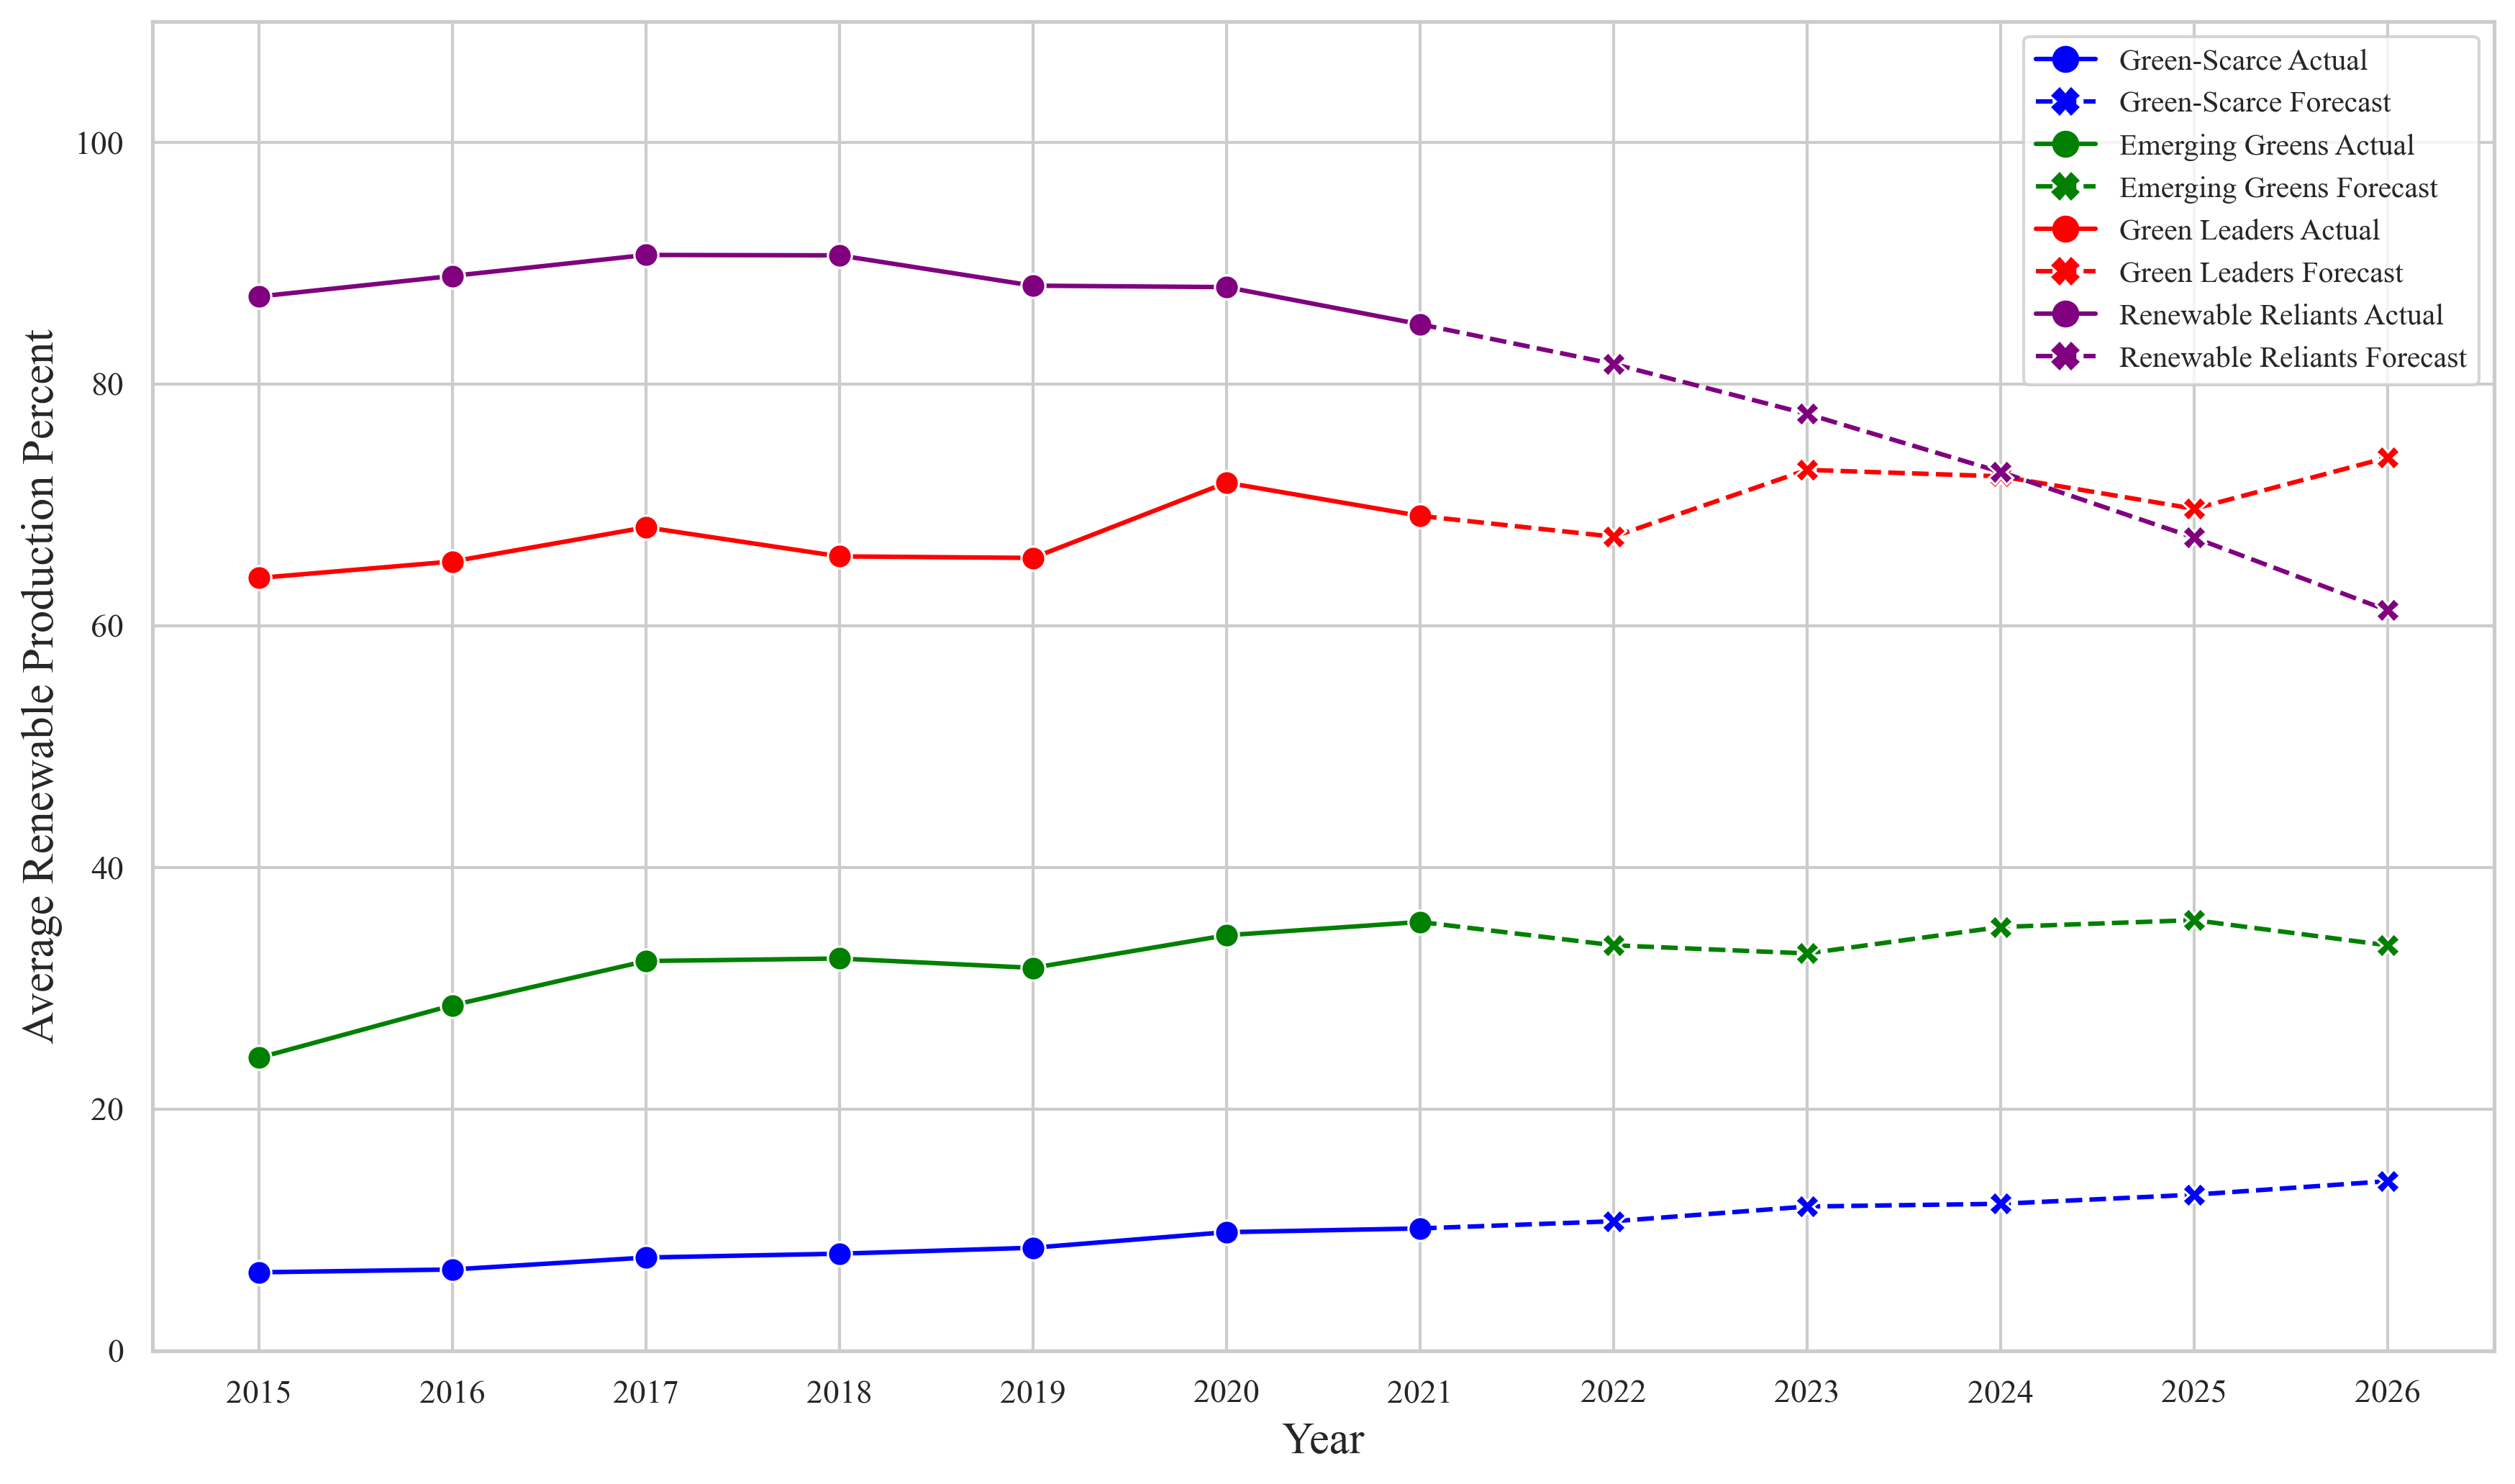

In [559]:
import matplotlib.lines as mlines
# Adjusting the legend to group actual and forecasted data for each cluster next to each other
legend_order = []
for cluster in cluster_averages.index:
    legend_order.append(cluster)  # Actual data label
    legend_order.append(f'{cluster} Forecast')  # Forecast data label

# Creating a new figure for the seaborn plot with connected actual and forecasted data points
plt.figure(figsize=(14, 8), dpi=300)

# Plotting original data for each cluster with seaborn for better aesthetics
for index, cluster in enumerate(cluster_averages.index):
    sns.lineplot(data=cluster_averages.loc[cluster], marker='o', markersize=8, color=colors[index], label=f'{cluster} Actual')
    # Connecting 2021 and 2022 data points with a dashed line for each cluster
    plt.plot([cluster_averages.columns[-1], forecast_df.index[0]], 
             [cluster_averages.loc[cluster][-1], forecast_df[cluster].iloc[0]], 
             linestyle='--', color=colors[index], linewidth=1.5)

# Plotting forecasted data for each cluster with seaborn, using 'X' markers
for index, cluster in enumerate(forecast_df.columns):
    sns.lineplot(data=forecast_df[cluster], marker='X', markersize=8, color=colors[index], linestyle='--', label=f'{cluster} Forecast')

# plt.title('Time Series and Forecast for Clusters (2022-2026)', fontsize=14)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Renewable Production Percent', fontsize=15)
# Adjusting the legend to handle duplicates

# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys(), title='Cluster / Forecast', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

legend_handles = []
for index, cluster in enumerate(cluster_averages.index):
    legend_handles.append(mlines.Line2D([], [], color=colors[index], marker='o', markersize=8, label=f'{cluster} Actual'))
    legend_handles.append(mlines.Line2D([], [], color=colors[index], marker='X', markersize=8, linestyle='--', label=f'{cluster} Forecast'))

plt.legend(handles=legend_handles, loc='upper right', fontsize=10)
plt.ylim(0, 110)

plt.show()

In [560]:
# Let's first load the provided dataset to understand its structure and content.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = data_path = "/Users/RayhanZirvi/Desktop/time_series_consume.csv"
data2 = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data2.head()


,State,2015,2016,2017,2018,2019,2020,2021
0,AK,4.042010,4.627617,4.238921,4.315660,4.057598,4.154670,3.777823
1,AL,13.248691,12.467667,13.998129,14.481994,14.555396,15.786436,14.368555
2,AR,13.152023,12.468495,11.706175,11.042253,12.200342,12.174993,10.895120
3,AZ,9.039539,10.047357,10.859494,10.898013,10.376131,11.502065,12.462193
4,CA,15.683131,19.265766,22.650710,20.774740,23.624390,24.712291,24.971704


In [561]:
# Creating clusters based on the provided grouping
clusters = {
    "Green-Scarce": ["AL", "AR", "AZ", "CT", "DE", "FL", "GA", "HI", "IL", "IN",
                     "KY", "LA", "MA", "MD", "MI", "MO", "NC", "NJ", "NY",
                     "OH", "PA", "RI", "SC", "TN", "TX", "UT", "VA", "WI", "WV"],
    "Emerging Greens": ["AK", "CA", "CO", "DC", "KS", "MN",
                        "MT", "ND", "NE", "NM", "NV", "OK", "WY"],
    "Green Leaders": ["IA", "ME", "OR", "SD", "WA"],
    "Renewable Reliants": ["ID", "VT"]
}

# Initializing a DataFrame to hold the averaged data for each cluster
cluster_averages = pd.DataFrame(columns=data2.columns[1:])  # Exclude 'State' column

# Calculating average for each cluster
for cluster_name, states in clusters.items():
    # Filter the dataset for states in the current cluster and calculate the mean
    cluster_mean = data2[data2['State'].isin(states)].iloc[:, 1:].mean()
    cluster_averages.loc[cluster_name] = cluster_mean

cluster_averages.head()

,2015,2016,2017,2018,2019,2020,2021
Green-Scarce,7.865289,8.079845,8.494475,8.509078,8.667194,9.545423,9.434750
Emerging Greens,13.556351,15.634038,17.548338,17.497972,18.219080,20.517515,21.300560
Green Leaders,63.659938,64.934062,67.176167,66.143877,62.209518,70.480911,68.697995
Renewable Reliants,48.937786,48.010966,52.406611,54.688472,50.751702,49.357145,45.672914


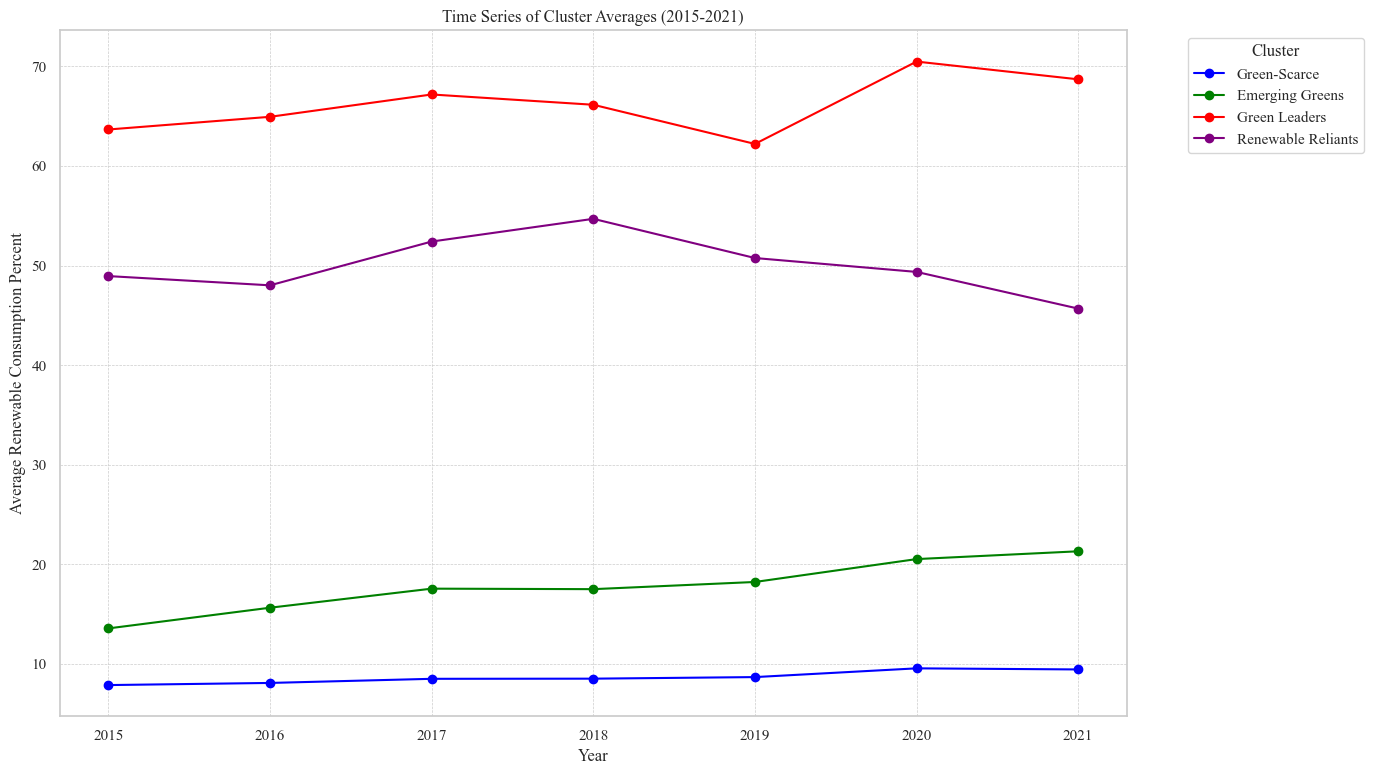

In [562]:
# Plotting time series for each cluster of states with distinguishable colors and dots on each data point
fig, ax = plt.subplots(figsize=(14, 8))

# Defining a list of distinguishable colors
colors = ['blue', 'green', 'red', 'purple']

# Plotting data for each cluster with marker='o' for dots and using the defined colors
for index, cluster in enumerate(cluster_averages.index):
    ax.plot(cluster_averages.columns, cluster_averages.loc[cluster], label=cluster, marker='o', color=colors[index])

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding title and labels with the updated y-axis label
plt.title('Time Series of Cluster Averages (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Average Renewable Consumption Percent')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improving layout to not cut off legend
plt.tight_layout()

# Show plot
plt.show()


In [563]:
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Function to fit an ARIMA model and forecast
def forecast_arima(series, steps=5):
    # Fit the ARIMA model (using order (1,1,1) as a starting point)
    model = ARIMA(series, order=(2,2,1))
    model_fit = model.fit()
    # Forecast
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecasting for the next 5 years for each cluster
forecasts = {}
for cluster in cluster_averages.index:
    series = cluster_averages.loc[cluster]
    forecast = forecast_arima(series, steps=5)
    forecasts[cluster] = forecast

# Convert forecasts to a DataFrame for easier handling
forecast_df = pd.DataFrame(forecasts)

# Adjusting the forecasted years based on the last year in the dataset
last_year = int(cluster_averages.columns[-1])
forecast_years = [str(year) for year in range(last_year + 1, last_year + 6)]
forecast_df.index = forecast_years

forecast_df

/Users/rayhanzirvi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/rayhanzirvi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/rayhanzirvi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/rayhanzirvi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/rayhanzirvi/Library/Python/3.9/l

,Green-Scarce,Emerging Greens,Green Leaders,Renewable Reliants
2022,9.552503,20.960180,66.964587,42.450050
2023,10.196516,22.540488,73.866337,41.523231
2024,10.299039,24.540501,71.625071,40.596411
2025,10.426053,24.472346,71.558318,39.669592
2026,10.914179,24.739945,77.100106,38.742772


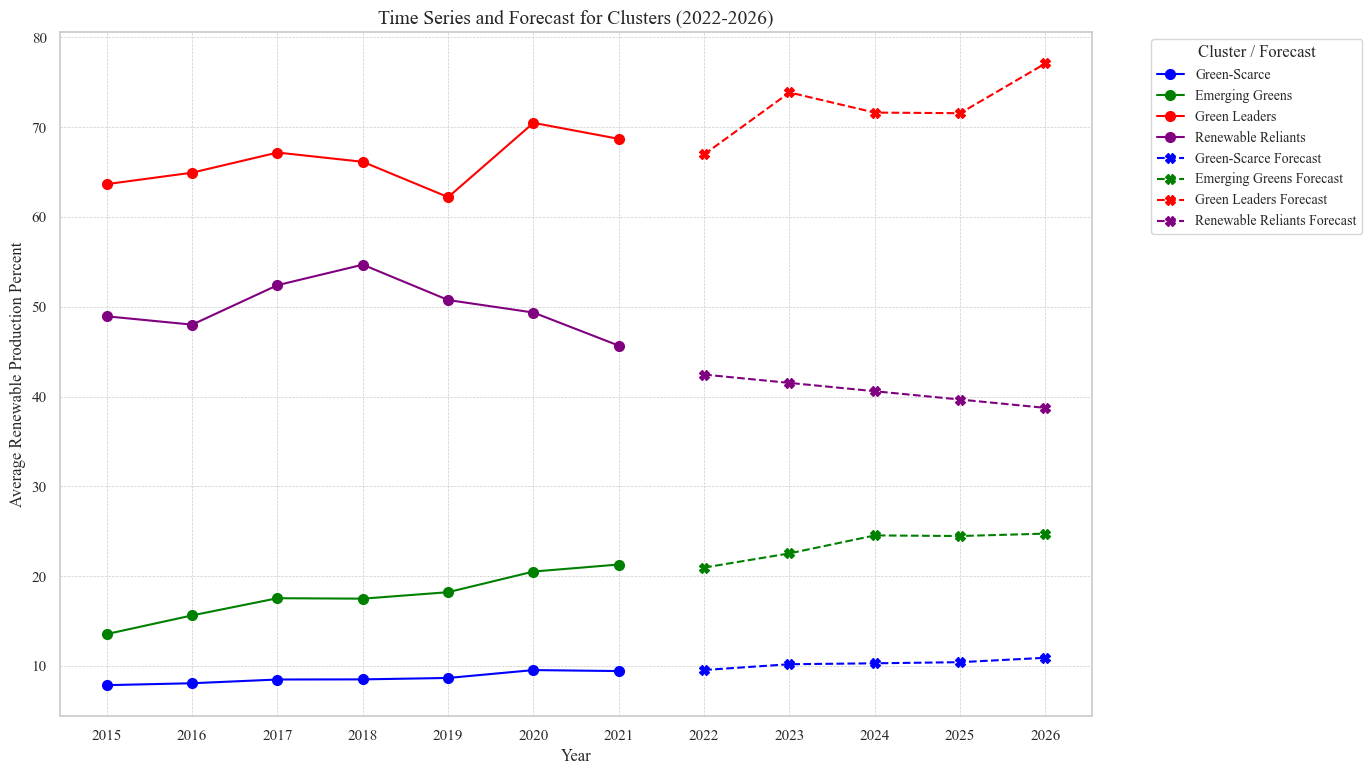

In [564]:
# Plotting the original and forecasted data for each cluster with distinguishable colors and markers

fig, ax = plt.subplots(figsize=(14, 8))

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"

# Plotting original data for each cluster with dots and using the defined colors
for index, cluster in enumerate(cluster_averages.index):
    ax.plot(cluster_averages.columns, cluster_averages.loc[cluster], label=cluster, marker='o', markersize = 7, color=colors[index], linestyle='-')

# Plotting forecasted data for each cluster with 'X' markers and using the same colors
for index, cluster in enumerate(forecast_df.columns):
    ax.plot(forecast_df.index, forecast_df[cluster], label=f'{cluster} Forecast', marker='X', markersize = 7, color=colors[index], linestyle='--')

# Adding grid lines, title, labels, and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Time Series and Forecast for Clusters (2022-2026)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Renewable Production Percent', fontsize=12)
plt.legend(title='Cluster / Forecast', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Improving layout to not cut off legend
plt.tight_layout()

# Show plot
plt.show()

/var/folders/mn/0wndgtfd13nf28t24tfh3zzr0000gn/T/ipykernel_25578/3439576002.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [cluster_averages.loc[cluster][-1], forecast_df[cluster].iloc[0]],
/var/folders/mn/0wndgtfd13nf28t24tfh3zzr0000gn/T/ipykernel_25578/3439576002.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [cluster_averages.loc[cluster][-1], forecast_df[cluster].iloc[0]],
/var/folders/mn/0wndgtfd13nf28t24tfh3zzr0000gn/T/ipykernel_25578/3439576002.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

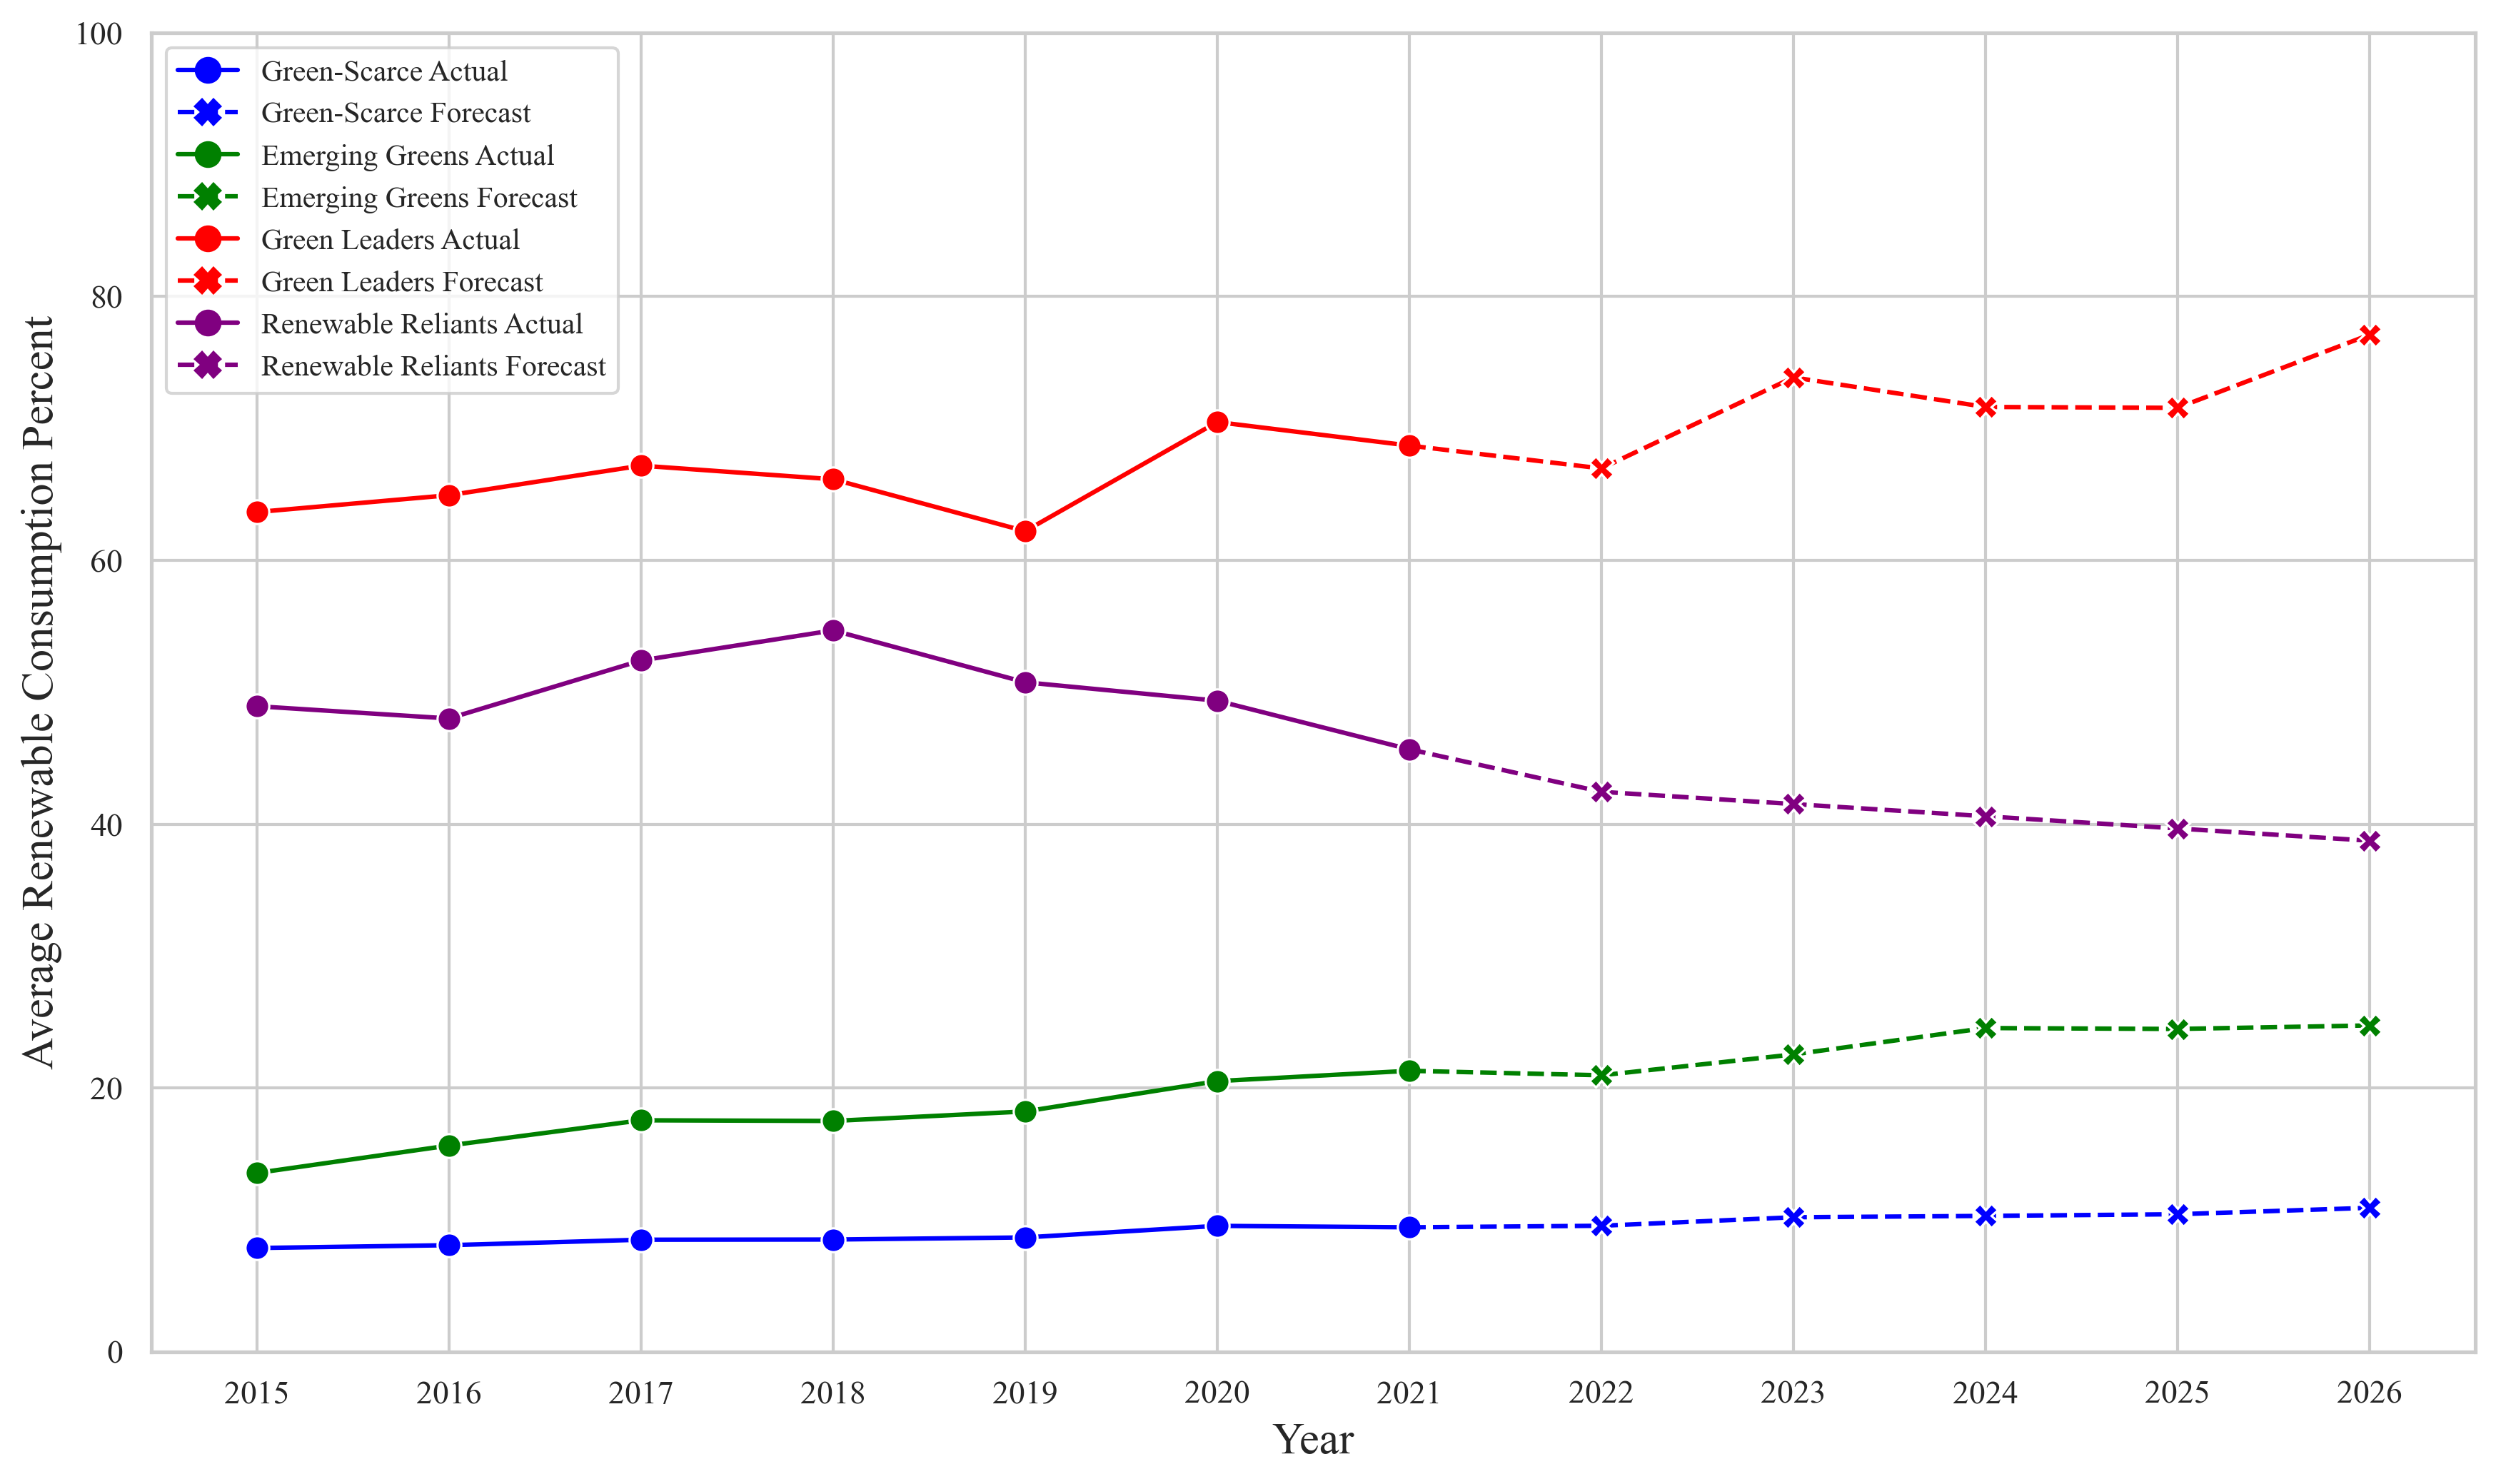

In [565]:
# Creating a new figure for the seaborn plot with connected actual and forecasted data points
plt.figure(figsize=(14, 8), dpi=300)

# Plotting original data for each cluster with seaborn for better aesthetics
for index, cluster in enumerate(cluster_averages.index):
    sns.lineplot(data=cluster_averages.loc[cluster], marker='o', markersize=8, color=colors[index], label=f'{cluster} Actual')
    # Connecting 2021 and 2022 data points with a dashed line for each cluster
    plt.plot([cluster_averages.columns[-1], forecast_df.index[0]], 
             [cluster_averages.loc[cluster][-1], forecast_df[cluster].iloc[0]], 
             linestyle='--', color=colors[index], linewidth=1.5)

# Plotting forecasted data for each cluster with seaborn, using 'X' markers
for index, cluster in enumerate(forecast_df.columns):
    sns.lineplot(data=forecast_df[cluster], marker='X', markersize=8, color=colors[index], linestyle='--', label=f'{cluster} Forecast')

# plt.title('Time Series and Forecast for Clusters (2022-2026)', fontsize=14)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Renewable Consumption Percent', fontsize=15)
# Adjusting the legend to handle duplicates
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys(), title='Cluster / Forecast', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

legend_handles = []
for index, cluster in enumerate(cluster_averages.index):
    legend_handles.append(mlines.Line2D([], [], color=colors[index], marker='o', markersize=8, label=f'{cluster} Actual'))
    legend_handles.append(mlines.Line2D([], [], color=colors[index], marker='X', markersize=8, linestyle='--', label=f'{cluster} Forecast'))

# plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.legend(handles=legend_handles, loc='upper left', fontsize=10)
plt.ylim(0, 100)

plt.show()